In [42]:
%matplotlib notebook

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import gmaps
from scipy.stats import linregress
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

# Import API key
#from api_keys import api_key
#from api_keys import g_key



In [83]:
# API responses for all sensor  at May 2019, this is the base url, then we add sensor id later to create search url 
url_2019 = "https://data.melbourne.vic.gov.au/resource/b2ak-trbp.json?year=2019&month=May"
response = requests.get(url_2019).json() 

# Discover the format of the response, *please keep in mind the response is a list of dictionaries*
response

[{'id': '2653505',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '1',
  'sensor_name': 'Bourke Street Mall (North)',
  'hourly_counts': '96'},
 {'id': '2653506',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '2',
  'sensor_name': 'Bourke Street Mall (South)',
  'hourly_counts': '42'},
 {'id': '2653507',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '3',
  'sensor_name': 'Melbourne Central',
  'hourly_counts': '285'},
 {'id': '2653508',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '4',
  'sensor_name': 'Town Hall (West)',
  'hourly_counts': '147'},
 {'id': '2653509',
  'date_time': '2019-05-01

In [3]:
# create empty lists to store data
sensorID = list()
hourly_count = list()
year = list()
month = list()
date = list()
day = list()
time = list()
sensor_name = list()

In [4]:
# Access API response, be aware that the response is a list of dictionaries.  
# To this point, this script calls API for 2019 and 2020 seperately, since url doesn't support multiple queries at the same time.
# However it is possible to define a function to do the task just once. 

for i in range(1,67): # we know that there are 67 sensors in the Melbourne city 
    
    print("Processing sensor id "+ str(i) + ", " + str(i) + " of 66, May 2019")
    query_url2019 = url_2019 + "&sensor_id=" +str(i)
    response = requests.get(query_url2019).json()
    
    length = len(response) # length of the response for a particular sensor, this is for the loop
   
    # accessing each dictionary using a loop 
    for x in range(length):
        sensorID.append(response[x]["sensor_id"])
        hourly_count.append(response[x]["hourly_counts"])
        year.append(response[x]["year"])
        month.append(response[x]["month"])
        date.append(response[x]["mdate"])
        day.append(response[x]["day"])
        time.append(response[x]["time"])
        sensor_name.append(response[x]["sensor_name"])  

print("Finished processing sensors data for May 2019")        

Processing sensor id 1, 1 of 66, May 2019
Processing sensor id 2, 2 of 66, May 2019
Processing sensor id 3, 3 of 66, May 2019
Processing sensor id 4, 4 of 66, May 2019
Processing sensor id 5, 5 of 66, May 2019
Processing sensor id 6, 6 of 66, May 2019
Processing sensor id 7, 7 of 66, May 2019
Processing sensor id 8, 8 of 66, May 2019
Processing sensor id 9, 9 of 66, May 2019
Processing sensor id 10, 10 of 66, May 2019
Processing sensor id 11, 11 of 66, May 2019
Processing sensor id 12, 12 of 66, May 2019
Processing sensor id 13, 13 of 66, May 2019
Processing sensor id 14, 14 of 66, May 2019
Processing sensor id 15, 15 of 66, May 2019
Processing sensor id 16, 16 of 66, May 2019
Processing sensor id 17, 17 of 66, May 2019
Processing sensor id 18, 18 of 66, May 2019
Processing sensor id 19, 19 of 66, May 2019
Processing sensor id 20, 20 of 66, May 2019
Processing sensor id 21, 21 of 66, May 2019
Processing sensor id 22, 22 of 66, May 2019
Processing sensor id 23, 23 of 66, May 2019
Proces

In [5]:
# adding data to a dataframe 
sensor_count_data_May2019 = pd.DataFrame({
                "sensor_id" : sensorID,
                "hourly_count" : hourly_count,
                "year": year,
                "month" : month,
                "date" : date,
                "day" : day,                                 
                "time" : time,
                "sensor_name" : sensor_name                  
})

sensor_count_data_May2019.sample(100)
# hooray!

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
10160,15,815,2019,May,22,Wednesday,10,State Library
28788,46,176,2019,May,11,Saturday,14,Pelham St (South)
34753,54,14,2019,May,12,Sunday,3,Lincoln-Swanston (West)
31707,50,3,2019,May,9,Thursday,5,Faraday St-Lygon St (West)
27865,44,1,2019,May,10,Friday,3,Tin Alley-Swanston St (West)
...,...,...,...,...,...,...,...,...
17398,26,119,2019,May,14,Tuesday,0,QV Market-Elizabeth St (West)
27037,43,677,2019,May,6,Monday,15,Monash Rd-Swanston St (West)
12162,19,1010,2019,May,12,Sunday,20,Chinatown-Swanston St (North)
25363,39,98,2019,May,29,Wednesday,21,Alfred Place


In [7]:
sensor_count_data_May2019.to_csv("output/sensor_count_data_May2019.csv", index = False)

In [8]:
# Repeat above steps for May 2020, again, a function can do it with only one call
url_2020 = "https://data.melbourne.vic.gov.au/resource/b2ak-trbp.json?year=2020&month=May" # base url

# create empty lists for data  
sensorID = list()
hourly_count = list()
year = list()
month = list()
date = list()
day = list()
time = list()
sensor_name = list()


In [9]:
# Access API response, be aware that the response is a list of dictionaries.  

for i in range(1,67): # we know that there are 67 sensors in the Melbourne city 
    
    print("Processing sensor id "+ str(i) + ", " + str(i) + " of 66, May 2020")
    query_url2020 = url_2020 + "&sensor_id=" +str(i)
    response = requests.get(query_url2020).json()
    
    length = len(response) # length of the response for a particular sensor
   
    # accessing each dictionary using a loop 
    for x in range(length):
        sensorID.append(response[x]["sensor_id"])
        hourly_count.append(response[x]["hourly_counts"])
        year.append(response[x]["year"])
        month.append(response[x]["month"])
        date.append(response[x]["mdate"])
        day.append(response[x]["day"])
        time.append(response[x]["time"])
        sensor_name.append(response[x]["sensor_name"])  

print("Finished processing sensors data for May 2020")   

Processing sensor id 1, 1 of 66, May 2020
Processing sensor id 2, 2 of 66, May 2020
Processing sensor id 3, 3 of 66, May 2020
Processing sensor id 4, 4 of 66, May 2020
Processing sensor id 5, 5 of 66, May 2020
Processing sensor id 6, 6 of 66, May 2020
Processing sensor id 7, 7 of 66, May 2020
Processing sensor id 8, 8 of 66, May 2020
Processing sensor id 9, 9 of 66, May 2020
Processing sensor id 10, 10 of 66, May 2020
Processing sensor id 11, 11 of 66, May 2020
Processing sensor id 12, 12 of 66, May 2020
Processing sensor id 13, 13 of 66, May 2020
Processing sensor id 14, 14 of 66, May 2020
Processing sensor id 15, 15 of 66, May 2020
Processing sensor id 16, 16 of 66, May 2020
Processing sensor id 17, 17 of 66, May 2020
Processing sensor id 18, 18 of 66, May 2020
Processing sensor id 19, 19 of 66, May 2020
Processing sensor id 20, 20 of 66, May 2020
Processing sensor id 21, 21 of 66, May 2020
Processing sensor id 22, 22 of 66, May 2020
Processing sensor id 23, 23 of 66, May 2020
Proces

In [10]:
# adding data to a dataframe 
sensor_count_data_May2020 = pd.DataFrame({
                "sensor_id" : sensorID,
                "hourly_count" : hourly_count,
                "year": year,
                "month" : month,
                "date" : date,
                "day" : day,                                 
                "time" : time,
                "sensor_name" : sensor_name                  
})

sensor_count_data_May2020.sample(100)

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
11031,17,225,2020,May,26,Tuesday,15,Collins Place (South)
39319,59,25,2020,May,14,Thursday,7,Swanston St - RMIT Building 80
14365,22,954,2020,May,10,Sunday,13,Flinders St-Elizabeth St (East)
5549,8,12,2020,May,15,Friday,5,Webb Bridge
1600,3,574,2020,May,5,Tuesday,16,Melbourne Central
...,...,...,...,...,...,...,...,...
39445,59,88,2020,May,19,Tuesday,13,Swanston St - RMIT Building 80
13659,21,12,2020,May,12,Tuesday,3,Bourke St-Russell St (West)
16277,24,133,2020,May,28,Thursday,5,Spencer St-Collins St (North)
2009,3,1041,2020,May,22,Friday,17,Melbourne Central


In [11]:
sensor_count_data_May2020.to_csv("output/sensor_count_data_May2020.csv", index = False)

In [ ]:



# Clean data - 
# 1 Keep common sensors in both csv
# 2 keep common sensors that have same value_counts() e.g. if a sensor has been working for a whole month, it should return 744 for value_counts() 
# 3 so we need to use inner join by multiple columns: sensor id, date, and time. What we will have are same sensors, same day, same time.





In [3]:
# Import 2019 dataframe
data_2019 = "output/sensor_count_data_May2019.csv"
df_2019 = pd.read_csv(data_2019)
df_2019.head()


,sensor_id,hourly_count,year,month,date,day,time,sensor_name
0,1,96,2019,May,1,Wednesday,0,Bourke Street Mall (North)
1,1,71,2019,May,1,Wednesday,1,Bourke Street Mall (North)
2,1,30,2019,May,1,Wednesday,2,Bourke Street Mall (North)
3,1,8,2019,May,1,Wednesday,3,Bourke Street Mall (North)
4,1,19,2019,May,1,Wednesday,4,Bourke Street Mall (North)


In [4]:
# Import 2020 dataframe
data_2020 = "output/sensor_count_data_May2020.csv"
df_2020 = pd.read_csv(data_2020)
df_2020.head()

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
0,1,9,2020,May,1,Friday,0,Bourke Street Mall (North)
1,1,2,2020,May,1,Friday,1,Bourke Street Mall (North)
2,1,2,2020,May,1,Friday,2,Bourke Street Mall (North)
3,1,5,2020,May,1,Friday,3,Bourke Street Mall (North)
4,1,4,2020,May,1,Friday,4,Bourke Street Mall (North)


In [9]:
# observe the sensor id, note that sensor at botton has different count. This means they were not working at some time.
df_2019["sensor_id"].value_counts()

31    744
48    744
15    744
46    744
14    744
44    744
12    744
43    744
11    744
42    744
10    744
9     744
40    744
8     744
39    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
33    744
30    744
47    744
17    744
54    744
28    744
59    744
27    744
58    744
26    744
57    744
25    744
56    744
24    744
49    744
23    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
1     744
3     718
60    216
45    144
29    144
Name: sensor_id, dtype: int64

In [10]:
# observe the sensor id
df_2020["sensor_id"].value_counts() 

63    744
39    744
46    744
14    744
45    744
44    744
12    744
43    744
11    744
10    744
41    744
9     744
40    744
8     744
7     744
31    744
6     744
37    744
5     744
36    744
4     744
35    744
3     744
66    744
34    744
2     744
65    744
1     744
15    744
47    744
48    744
23    744
62    744
30    744
61    744
29    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
17    744
55    744
54    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
49    744
59    696
42    672
64    624
25    384
Name: sensor_id, dtype: int64

In [18]:
# merge all datafrome together
clean_data  = pd.merge(left=df_2019, right=df_2020, on=["sensor_id","date","time"], how='inner')
clean_data.head()                       

,sensor_id,hourly_count_x,year_x,month_x,date,day_x,time,sensor_name_x,hourly_count_y,year_y,month_y,day_y,sensor_name_y
0,1,96,2019,May,1,Wednesday,0,Bourke Street Mall (North),9,2020,May,Friday,Bourke Street Mall (North)
1,1,71,2019,May,1,Wednesday,1,Bourke Street Mall (North),2,2020,May,Friday,Bourke Street Mall (North)
2,1,30,2019,May,1,Wednesday,2,Bourke Street Mall (North),2,2020,May,Friday,Bourke Street Mall (North)
3,1,8,2019,May,1,Wednesday,3,Bourke Street Mall (North),5,2020,May,Friday,Bourke Street Mall (North)
4,1,19,2019,May,1,Wednesday,4,Bourke Street Mall (North),4,2020,May,Friday,Bourke Street Mall (North)


In [19]:
clean_data["sensor_id"].value_counts()
# need to drop some sensors at the botton 

31    744
48    744
15    744
46    744
14    744
44    744
12    744
43    744
11    744
10    744
9     744
40    744
8     744
39    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
30    744
47    744
17    744
22    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
23    744
49    744
54    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
1     744
3     718
59    696
42    672
25    384
45    144
29    144
Name: sensor_id, dtype: int64

In [20]:
# drop sensor that has less than 744 counts

clean_data = clean_data.groupby("sensor_id").filter(lambda x : len(x)==744)
clean_data["sensor_id"].value_counts()

31    744
8     744
46    744
14    744
44    744
12    744
43    744
11    744
10    744
9     744
40    744
39    744
30    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
15    744
47    744
48    744
17    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
23    744
54    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
49    744
1     744
Name: sensor_id, dtype: int64

In [25]:
# rename columns to make it readable
merged_clean_data = clean_data.rename(columns = {
    "sensor_id" : "Sensor ID",
    "date": "Date",
    "time" : "Time",
    "hourly_count_x" : "Hourly counts (2019)",
    "day_x" : "Day (2019)",
    "hourly_count_y" : "Hourly counts (2020)",
    "day_y" : "Day (2020)",
    "month_x" : "Month",
    "sensor_name_x" : "Sensor name"  
}
)

merged_clean_data = merged_clean_data[["Sensor ID","Date","Time","Hourly counts (2019)","Hourly counts (2020)","Day (2019)","Day (2020)","Month","Sensor name" ]]
merged_clean_data.head(100)

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North)
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North)
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North)
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North)
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
95,1,4,23,415,35,Saturday,Monday,May,Bourke Street Mall (North)
96,1,5,0,238,13,Sunday,Tuesday,May,Bourke Street Mall (North)
97,1,5,1,149,15,Sunday,Tuesday,May,Bourke Street Mall (North)
98,1,5,2,123,15,Sunday,Tuesday,May,Bourke Street Mall (North)


In [26]:
# Exporting merged data to csv
merged_clean_data.to_csv("output/merged_clean_data.csv", index = False)
print("Exported dataframe to csv!")

Exported datafrome to csv!


In [49]:
# import merged_clean_data
merged_clean_data = "output/merged_clean_data.csv"
merged_clean_data = pd.read_csv(merged_clean_data)
merged_clean_data.head()

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North),7am earier


In [50]:
# group data by three columns for hourly counts total
groupped_by_date_time = merged_clean_data.groupby(["Date","Time","Day (2019)","Day (2020)"]).agg({"Hourly counts (2019)":"sum", "Hourly counts (2020)":"sum"}).reset_index()

# rename the columns to make it more readable

groupped_by_date_time = groupped_by_date_time.rename(columns = {
    "Hourly counts (2019)" : "Total hourly counts (2019)",
    "Hourly counts (2020)": "Total hourly counts (2020)",
}
)

groupped_by_date_time.head(200)



,Date,Time,Day (2019),Day (2020),Total hourly counts (2019),Total hourly counts (2020)
0,1,0,Wednesday,Friday,3236,566
1,1,1,Wednesday,Friday,1822,401
2,1,2,Wednesday,Friday,1009,311
3,1,3,Wednesday,Friday,844,359
4,1,4,Wednesday,Friday,846,354
...,...,...,...,...,...,...
195,9,3,Thursday,Saturday,799,385
196,9,4,Thursday,Saturday,782,369
197,9,5,Thursday,Saturday,2604,690
198,9,6,Thursday,Saturday,10281,1183


In [51]:
# export to csv
groupped_by_date_time.to_csv("output/groupped_by_date_time.csv", index = False)
print("Exported dataframe to csv!")


Exported dataframe to csv!


In [52]:
# import groupped_by_date_time data
groupped_by_date_time = "output/groupped_by_date_time.csv"
groupped_by_date_time = pd.read_csv(groupped_by_date_time)
groupped_by_date_time.head()

,Date,Time,Day (2019),Day (2020),Total hourly counts (2019),Total hourly counts (2020)
0,1,0,Wednesday,Friday,3236,566
1,1,1,Wednesday,Friday,1822,401
2,1,2,Wednesday,Friday,1009,311
3,1,3,Wednesday,Friday,844,359
4,1,4,Wednesday,Friday,846,354


<IPython.core.display.Javascript object>


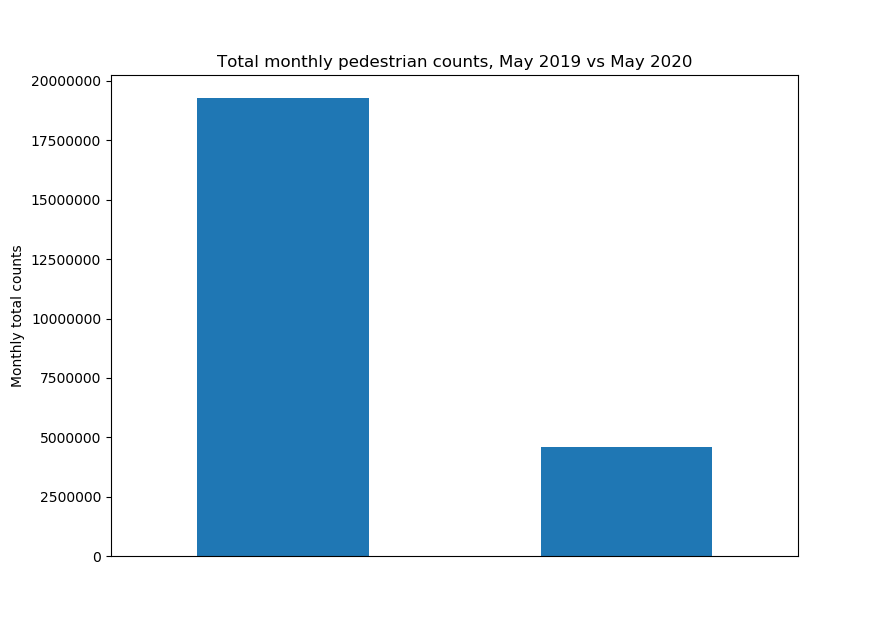

The total count for May 2019 is 19280331, the total count for May 2020 is 4586894
The number of pedestrian has been reduced by 76.2%


In [68]:
# Creating total counts for May 2019 and June 2019



groupped_by_date_time[["Total hourly counts (2019)","Total hourly counts (2020)"]].sum().plot.bar()



# remove the scientific notation on y axis 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


plt.title("Total monthly pedestrian counts, May 2019 vs May 2020")



plt.xticks([])
#plt.xticks(rotation=0)

plt.ylabel("Monthly total counts")



plt.show()

print("The total count for May 2019 is 19280331, the total count for May 2020 is 4586894")
print("The number of pedestrian has been reduced by 76.2%")

In [54]:
# cutting sensor data into bins
hour_bins = [-1, 6.9, 10.9, 14.9, 18.9, 23.9]
hour_label = ["7am earier","Morning Peak: 7am-10am","11am-14pm","Afternoon Peak:15pm-18pm", "19pm-midnight"]

merged_clean_data["Time period"] = pd.cut(merged_clean_data["Time"], hour_bins, labels = hour_label)

merged_clean_data.head(50)

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
5,1,1,5,42,12,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
6,1,1,6,105,47,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
7,1,1,7,386,56,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am
8,1,1,8,1014,139,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am
9,1,1,9,1084,243,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am


In [55]:
# Exporting merged data to csv
merged_clean_data.to_csv("output/merged_clean_data.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


In [56]:
# group by period and sum by binned total counts for May 2019

May2019_count_by_period = merged_clean_data.groupby(["Time period"])["Hourly counts (2019)"].sum().to_frame(name = "Total count 2019").reset_index()

May2019_count_by_period.head(50)

,Time period,Total count 2019
0,7am earier,696990
1,Morning Peak: 7am-10am,3684578
2,11am-14pm,5537238
3,Afternoon Peak:15pm-18pm,6306970
4,19pm-midnight,3054555


In [57]:
# group by period and sum by binned total counts for May 2020

In [58]:
May2020_count_by_period = merged_clean_data.groupby(["Time period"])["Hourly counts (2020)"].sum().to_frame(name = "Total count 2020").reset_index()

May2020_count_by_period.head(50)

,Time period,Total count 2020
0,7am earier,189529
1,Morning Peak: 7am-10am,742654
2,11am-14pm,1650816
3,Afternoon Peak:15pm-18pm,1520567
4,19pm-midnight,483328


In [59]:
# merge above dataframes to produce line chart 
count_by_period_merged  = pd.merge(left=May2019_count_by_period, right=May2020_count_by_period, on=["Time period"], how='inner')
count_by_period_merged.head()     

,Time period,Total count 2019,Total count 2020
0,7am earier,696990,189529
1,Morning Peak: 7am-10am,3684578,742654
2,11am-14pm,5537238,1650816
3,Afternoon Peak:15pm-18pm,6306970,1520567
4,19pm-midnight,3054555,483328


In [60]:
# to csv
count_by_period_merged.to_csv("output/count_by_period_merged.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


<IPython.core.display.Javascript object>


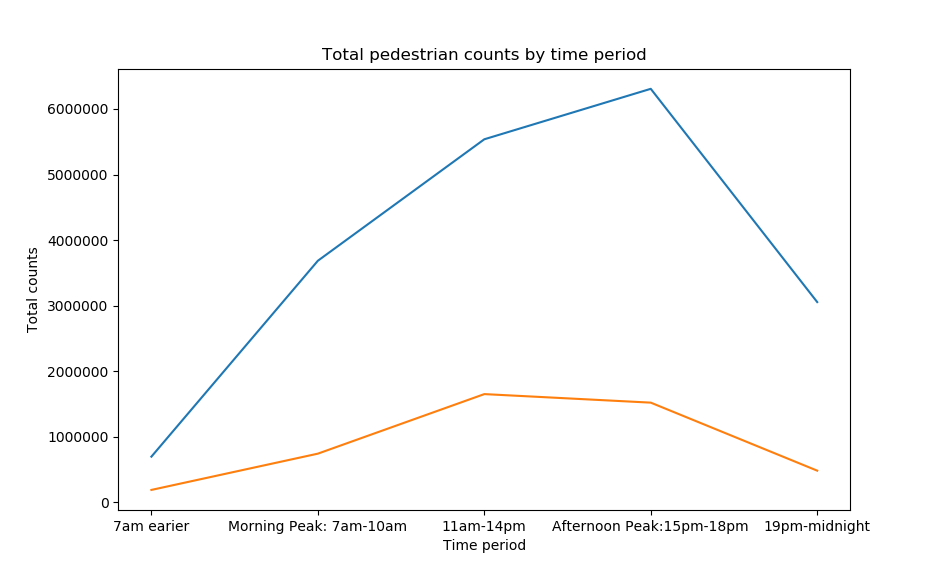

In [69]:
# Plot the count by period to line 
plt.plot(count_by_period_merged["Time period"], count_by_period_merged["Total count 2019"])
plt.plot(count_by_period_merged["Time period"], count_by_period_merged["Total count 2020"])
plt.title("Total pedestrian counts by time period")
plt.xlabel("Time period")
plt.ylabel("Total counts")
plt.show()
